In [1]:
import tensorflow as tf
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_paths = tf.io.matching_files('./dataset/mnist_png/training/*/*.png')
data_paths

<tf.Tensor: shape=(60000,), dtype=string, numpy=
array([b'.\\dataset\\mnist_png\\training\\0\\1.png',
       b'.\\dataset\\mnist_png\\training\\0\\1000.png',
       b'.\\dataset\\mnist_png\\training\\0\\10005.png', ...,
       b'.\\dataset\\mnist_png\\training\\9\\9968.png',
       b'.\\dataset\\mnist_png\\training\\9\\9969.png',
       b'.\\dataset\\mnist_png\\training\\9\\9998.png'], dtype=object)>

## Load Image

In [3]:
gfile = tf.io.read_file(data_paths[0])
image = tf.io.decode_image(gfile)
image.shape

TensorShape([28, 28, 1])

## ImageDataGenerator

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
inputs = image[tf.newaxis, ...]

In [6]:
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

0.0 254.08093 39.66013


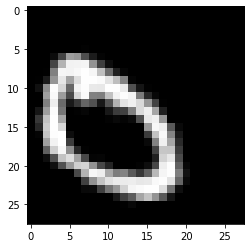

In [7]:
result = next(iter(datagen.flow(inputs)))

print(np.min(result), np.max(result), np.mean(result))

plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

## Transformation

- width_shift_range  
- height_shift_range  
  
- brightness_range  
- zoom_range  
  
- horizontal_flip  
- vertical_flip  
  
- rescale  
  
- preprocessing_function 

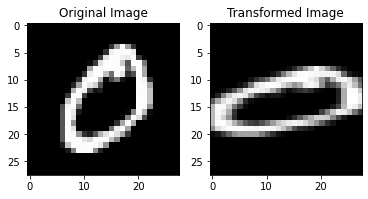

In [8]:
datagen = ImageDataGenerator(
    zoom_range=0.7
)

result = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title("Original Image")
plt.imshow(np.squeeze(inputs), 'gray')
plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(np.squeeze(result), 'gray')
plt.show()

In [9]:
print(inputs.shape)

a = np.squeeze(inputs)
print(a.shape)

b = inputs[0, :, :, 0]
print(b.shape)

(1, 28, 28, 1)
(28, 28)
(28, 28)


## Rescale시 주의사항

In [10]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

# test data는 zoom 처리하지 않음.

test_datagen = ImageDataGenerator(
    rescale=1./255
)